In [17]:
# Initialize Otter
import otter
grader = otter.Notebook()

# DATA 601: Fall 2020

## HW1

### Due: Wed. Sep. 23 at 23:55

**Learning Objectives**

- Explore collection classes in Python.
- Use intermediate level data structures and programming concepts in the context of data related problems.

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment.  

#### Submission 

Your submission will be graded using a combination of auto-grading and manual grading. In order to ensure that everything goes smoothly, please follow these instructions:

- Please provide your solutions where asked; please do not alter any other parts of this notebook.
- Please follow the instructions outlined in the last cell of this notebook to prepare your work for submission on Gradescope.

## Question 1: List Processing

#### (5 points)

The questions below ask you to process data stored in lists. To focus on problem solving and to make your code more readable, *you may use built-in functions*. Please try and use comprehensions whenever possible.

a. Given two lists, write a Python function called `myprod(l1, l2)` that produces a list containing all possible pairings &mdash; as tuples &mdash; of the elements in the two lists, i.e. the Cartesian product of the two lists. The first element of each tuple should come from `l1` and the second element should come from `l2`. You can assume that the lists will not have any duplicates.  
<br>
For example, the Cartesian product of the two lists `['A', 'K', 'Q', 'J', '10', '9', '8', '7', '6', '5', '4', '3', '2']` and `['♠', '♥', '♦', '♣']` should yield a standard deck of playing cards.

<!--
BEGIN QUESTION
name: q1a
manual: false
points: 1
-->

In [18]:
def myprod(l1, l2):
    return [(i,j) for i in l1 for j in l2]
    ...

In [19]:
grader.check("q1a")

All tests passed!

b. Write a Python function called `mytally( li )` that takes a list `li` and returns a dictionary whose keys are the unique entries in `li` and whose values are the counts of each of the unique entries. For example:<br><br>
      `mytally( [1, 2, 3, 3, 4, 5, 6, 6, 6, 7, 8, 9, 9] )` <br> 
      should return <br>
      `{1:1, 2:1, 3:2, 4:1, 5:1, 6:3, 7:1, 8:1, 9:2}`
      
<!--
BEGIN QUESTION
name: q1b
manual: false
points: 2
-->

In [20]:
def mytally( li ):
    return dict((number, li.count(number)) for number in li)
        
...

Ellipsis

In [21]:
grader.check("q1b")

All tests passed!

c. Write a function called `mysplit( li )` that takes a list `li` and splits it into sublists consisting of runs of identitical elements. The returned list should be sorted in ascending order. You may assume that `li` consists of immutable and comparable objects. For example:<br><br>
   `mysplit( [1, 2, 3, 3, 4, 5, 6, 6, 6, 7, 8, 9, 9] )` <br> 
    should return <br>
    `[[1], [2], [3,3], [4], [5], [6,6,6], [7], [8], [9,9]]`
    
<!--
BEGIN QUESTION
name: q1c
manual: false
points: 2
-->

In [22]:
def mysplit( li ):
    li.sort()
    result=[]
    
    for x in range(len(li)):
        if li[x]!=li[x+1]:
            sublist =[li[x]]*li.count(li[x])
            result.append(sublist)
            
        if li[x]==li[-1]:
            sublist = [li[x]]*li.count(li[x])
            result.append(sublist)
            break
    return result


In [23]:
grader.check("q1c")

All tests passed!

<!-- BEGIN QUESTION -->

## Question 2: Plotting Functions

#### (6 points)

Please go through the following tutorial, focusing on the first two sections.

  [https://matplotlib.org/users/pyplot_tutorial.html](https://matplotlib.org/users/pyplot_tutorial.html)
  

Use [`matplotlib.pyplot.plot`](https://matplotlib.org/users/pyplot_tutorial.html) to plot the following sequences for $ 2 \le n \le 100$. 

 a) $f_n = n^2$

 b) $f_n = \log_2 n$ 
  <br>
  (Use `math.log2(x)` to compute base 2 logarithms. You will need to `import math`)

 c) $f_n = 
    \begin{cases}
    \frac{4}{n^2 \pi^2} & \text{if } n \text{ is odd,} \\
    0 & \text{otherwise}.
    \end{cases}
    $  
    (Use `math.pi` for $\pi$. You will need to `import math`)

In order to compare the relative growth rates, ***please plot within the same figure***. Use different line styles so that the sequences can be distinguished, and label your axes appropriately. Please also use logarithmic scaling on the vertical axis (`plt.yscale(‘log’)`) so that the relative magnitudes of the sequences is more apparent.

<!--
BEGIN QUESTION
name: q2
manual: true
points: 6
-->


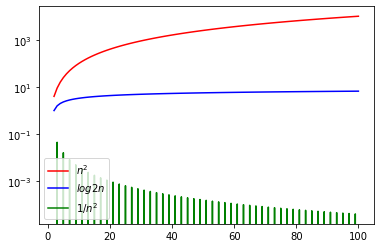

In [24]:
import matplotlib.pyplot as plt
import math
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = [i for i in range(2,101)]
y = [i**2 for i in x]
y1 = [math.log2(i) for i in x]

plt.semilogy(x,y,'r-',label='$n^2$')
plt.semilogy(x,y1,'b-',label='$log2n$')
def y2(x):
    if (x % 2) != 0:
        result = 4/(math.pi**2)/(x**2)
    else:
        result = 0
    return result
y2 =[y2(i) for i in x]
plt.semilogy(x,y2,'g-',label='$1/n^2$')
plt.legend()
plt.yscale('log')

<!-- END QUESTION -->



## Question 3: Estimating a Binomial Distribution

#### (7 points)

This question asks you to empirically estimate a binomial distribution by simulating binomial trials. A high-level description of the tasks that you need to perform is provided below. You will need to think about suitable data structures and programming constructs that will accomplish the tasks. You may use [built-in](https://docs.python.org/3/library/functions.html) functions. 

1. Write a function to simulate a binomial experiment. Your function should return the number of successess in $n$ repeated trials where the probability of success for each trial is $p$. Take $n=40$ and $p=0.5$. Use a random number generator to determine if the outcome is a success or a failure. Let $\xi$ be a uniformly distributed random number in the range $[0,1)$. If $\xi < p$, then the outcome is a success, otherwise it is a failure. You can use  `math.random.random()`  to generate a uniformly distributed random `float` in the range $[0,1)$.

2. Repeat the above experiment $N$ times to determine an empirical distribution corresponding to the probability of $k$ success in $n$ trials. 
Determine two empirical distributions by taking $N=10^3$ and $N=10^6$.

3. On the same figure, plot the empirical distributions corresponding to $N=10^3$ and $N=10^6$. For comaprison, also plot the true binomial distribution for this scenario. How do the empirial distributions compare to the true distribution?


<!-- BEGIN QUESTION -->

Please write your code in the cell below. 
<!--
BEGIN QUESTION
name: q3_code
manual: true
points: 5
-->

22


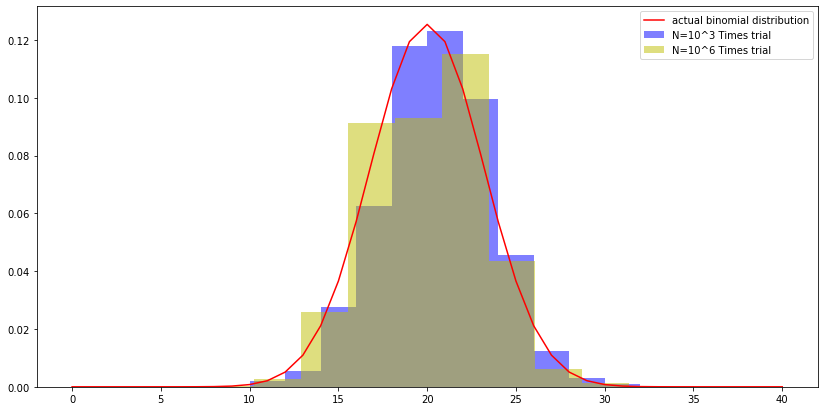

In [25]:
#https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b
import random
import matplotlib.pyplot as plt

def bio_trial(n):
    k = 0
    for i in range(n):
        if random.random() < 0.5:
            k += 1
    return k

print(bio_trial(40))

n=40
p=0.5
def bio_function(N,n):
    success = []
    for i in range(N):
        a = [random.random() for i in range(n)]
        success.append(len([i for i in a if i<p]))
    return success
success = bio_function(10**3,n)
success1 = bio_function(10**6,n)
   
ax0 = plt.subplots(figsize=(14,7))

ax = plt.hist(success,density=1, label = 'N=10^3 Times trial',bins=11,color = "b",alpha = 0.5) 
ax1 = plt.hist(success1, density=1,label = 'N=10^6 Times trial',bins=11,color = "y",alpha = 0.5)

from scipy.stats import binom
x = range(0,41)
plt.plot(x,binom.pmf(x,n,p),'r', label = 'actual binomial distribution')
plt.legend()
plt.show()




<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Please use the Markdown cell below to explain your findings.

<!--
BEGIN QUESTION
name: q3_written
manual: true
points: 1
-->

Compared with the actual binomial distribution, empirial distributions are more skewed. However, with more trials, it tends to be more similar to the actual distribution.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [15]:
grader.check_all()

A1:

    
    0 of 1 tests passed
    
    
    Tests failed:
    
           tests/A1.py

Test result:
Trying:
    assert tri(1) == 1;
Expecting nothing
**********************************************************************
Line 1, in tests/A1.py 0
Failed example:
    assert tri(1) == 1;
Exception raised:
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest tests/A1.py 0[0]>", line 1, in <module>
        assert tri(1) == 1;
    NameError: name 'tri' is not defined
Trying:
    assert tri(5) == 15;
Expecting nothing
**********************************************************************
Line 2, in tests/A1.py 0
Failed example:
    assert tri(5) == 15;
Exception raised:
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest tests/A1.py 0[1]>", line 1, in <module>
        assert tri(5) == 15;
    NameError: name 'tri' is not defined
Trying:
    assert tri(36) == 666;
Expecting nothing
**********************************************************************
Line 3, in tests/A1.py 0
Failed example:
    assert tri(36) == 666;
Exception raised:
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest tests/A1.py 0[2]>", line 1, in <module>
        assert tri(36) == 666;
    NameError: name 'tri' is not defined
Trying:
    assert tri(10 ** 5) == 5000050000
Expecting nothing
**********************************************************************
Line 4, in tests/A1.py 0
Failed example:
    assert tri(10 ** 5) == 5000050000
Exception raised:
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest tests/A1.py 0[3]>", line 1, in <module>
        assert tri(10 ** 5) == 5000050000
    NameError: name 'tri' is not defined

    
    
    
    

A2:

    
    0 of 1 tests passed
    
    
    Tests failed:
    
           tests/A2.py

Test result:
Trying:
    assert powerOfTwo(1) is True;
Expecting nothing
**********************************************************************
Line 1, in tests/A2.py 0
Failed example:
    assert powerOfTwo(1) is True;
Exception raised:
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest tests/A2.py 0[0]>", line 1, in <module>
        assert powerOfTwo(1) is True;
    NameError: name 'powerOfTwo' is not defined
Trying:
    assert powerOfTwo(2) is True;
Expecting nothing
**********************************************************************
Line 2, in tests/A2.py 0
Failed example:
    assert powerOfTwo(2) is True;
Exception raised:
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest tests/A2.py 0[1]>", line 1, in <module>
        assert powerOfTwo(2) is True;
    NameError: name 'powerOfTwo' is not defined
Trying:
    assert powerOfTwo(64) is True;
Expecting nothing
**********************************************************************
Line 3, in tests/A2.py 0
Failed example:
    assert powerOfTwo(64) is True;
Exception raised:
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest tests/A2.py 0[2]>", line 1, in <module>
        assert powerOfTwo(64) is True;
    NameError: name 'powerOfTwo' is not defined
Trying:
    assert powerOfTwo(96) is False;
Expecting nothing
****************************************

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [16]:
# Save your notebook first, then run this cell to export your submission.
grader.export("HW1.ipynb", pdf=False)